In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#Import CSV
SuicideData = pd.read_csv("Suicides_per_year.csv")
SocialData = pd.read_csv("users-by-social-media-platform.csv")

In [3]:
Social=SocialData.rename(columns = {'Entity':"Platform", "Monthly active users (Statista and TNW (2019))":"Monthly Users"})
SocialMedia = Social.groupby(["Year"])
Total_Users = SocialMedia.sum().reset_index().rename(columns={"Monthly Users":"Total Monthly Users"})
Total_Users

,Year,Total Monthly Users
0,2002,3000000
1,2003,4470000
2,2004,15525405
3,2005,55892892
4,2006,133727481
5,2007,323723343
6,2008,649259280
7,2009,939537344
8,2010,1459764216
9,2011,1975107328


In [4]:
Platforms = Social["Platform"].unique().tolist()

Social_Media = []
for platform in Platforms:
    x = (Social.loc[(Social["Platform"]==platform)]).rename(columns={"Monthly Users":f"{platform} Monthly Users"})
    x= x[["Year", f"{platform} Monthly Users" ]]
    Social_Media = pd.merge(Total_Users, x, on='Year', how = "outer")
    Total_Users = Social_Media

Social_Media = Social_Media.fillna(0)
Social_Media
Social_Media=Social_Media.rename(columns={"Year":"year"})
Social_Media
    

,year,Total Monthly Users,Facebook Monthly Users,Flickr Monthly Users,Friendster Monthly Users,Google Buzz Monthly Users,Google+ Monthly Users,Hi5 Monthly Users,Instagram Monthly Users,MySpace Monthly Users,...,Pinterest Monthly Users,Reddit Monthly Users,Snapchat Monthly Users,TikTok Monthly Users,Tumblr Monthly Users,Twitter Monthly Users,WeChat Monthly Users,Weibo Monthly Users,Whatsapp Monthly Users,YouTube Monthly Users
0,2002,3000000,0.000000e+00,0.0,3000000.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
1,2003,4470000,0.000000e+00,0.0,4470000.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
2,2004,15525405,0.000000e+00,3675135.0,5970054.0,0.0,0.0,0.0,0.000000e+00,980036.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
3,2005,55892892,0.000000e+00,7399354.0,7459742.0,0.0,0.0,9731610.0,0.000000e+00,19490059.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.946322e+06
4,2006,133727481,0.000000e+00,14949270.0,8989854.0,0.0,0.0,19932360.0,0.000000e+00,54763260.0,...,0.0,248309.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.987825e+07
5,2007,323723343,0.000000e+00,29299875.0,24253200.0,0.0,0.0,29533250.0,0.000000e+00,69299875.0,...,0.0,488331.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.439322e+08
6,2008,649259280,1.000000e+08,30000000.0,51008911.0,0.0,0.0,55045618.0,0.000000e+00,72408233.0,...,0.0,1944940.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,2.944940e+08
7,2009,939537344,2.760000e+08,41834525.0,28804331.0,0.0,0.0,57893524.0,0.000000e+00,70133095.0,...,0.0,3893524.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,4.136114e+08
8,2010,1459764216,5.177500e+08,54708063.0,0.0,166029650.0,0.0,59953290.0,0.000000e+00,68046710.0,...,0.0,0.0,0.0,0.0,0.0,43250000.0,0.000000e+00,19532900.0,0.000000e+00,4.805520e+08
9,2011,1975107328,7.660000e+08,66954600.0,0.0,170000000.0,0.0,46610848.0,0.000000e+00,46003536.0,...,0.0,0.0,0.0,0.0,0.0,92750000.0,4.781840e+07,48691040.0,0.000000e+00,6.426698e+08


In [5]:
SuicideData.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
data_df= pd.merge(SuicideData,Social_Media, on ="year",how="left")
data_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),...,Pinterest Monthly Users,Reddit Monthly Users,Snapchat Monthly Users,TikTok Monthly Users,Tumblr Monthly Users,Twitter Monthly Users,WeChat Monthly Users,Weibo Monthly Users,Whatsapp Monthly Users,YouTube Monthly Users
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_df = data_df.fillna(0)
data_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),...,Pinterest Monthly Users,Reddit Monthly Users,Snapchat Monthly Users,TikTok Monthly Users,Tumblr Monthly Users,Twitter Monthly Users,WeChat Monthly Users,Weibo Monthly Users,Whatsapp Monthly Users,YouTube Monthly Users
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.000,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.000,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.000,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.000,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.000,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",...,0.0,135786956.0,0.0,0.0,388721163.0,223675000.0,444232415.0,154890345.0,498750000.0,1.249452e+09
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",...,0.0,135786956.0,0.0,0.0,388721163.0,223675000.0,444232415.0,154890345.0,498750000.0,1.249452e+09
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",...,0.0,135786956.0,0.0,0.0,388721163.0,223675000.0,444232415.0,154890345.0,498750000.0,1.249452e+09
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",...,0.0,135786956.0,0.0,0.0,388721163.0,223675000.0,444232415.0,154890345.0,498750000.0,1.249452e+09


In [8]:
country_count= len(data_df["country"].unique())
country_count

101

In [12]:
#USA

suicide_data_95_data= SuicideData.loc[(SuicideData["year"]>1995)&(SuicideData["country"]=="United States"),("year","generation","suicides/100k pop")]

suicide_data_95_USA=suicide_data_95_data.groupby(["year","generation"],as_index=False).mean()





No handles with labels found to put in legend.


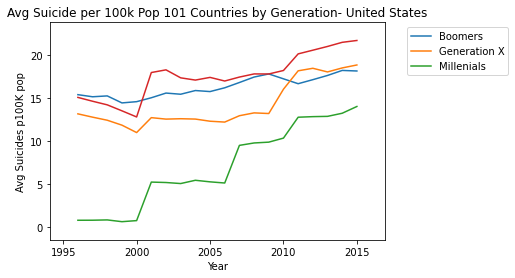

In [28]:

# Cleam table with Generations with little information (GI Generation 93 to 113 years-old) and Generation Z (5 to 14 years-old) 


generations = ["Boomers","Generation X","Millenials","Silent"]

plt.title("Avg Suicide per 100k Pop 101 Countries by Generation- United States")
plt.xlabel("Year")
plt.ylabel("Avg Suicides p100K pop")

for generation in generations:
    y_axis= suicide_data_95_USA['suicides/100k pop'].loc[(suicide_data_95_USA['generation']==generation)]
    x_axis= suicide_data_95_USA['year'].loc[(suicide_data_95_USA['generation']==generation)]

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.margins(0.1)
    fig = plt.figure(num=1, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
    plt.plot (x_axis,y_axis,label=generation)
    
plt.savefig("by_Generation_USA.png")
                                        


In [14]:
#All Countries

suicide_data_95_data= SuicideData.loc[(SuicideData["year"]>1995),("year","generation","suicides/100k pop")]

suicide_data_95_all=suicide_data_95_data.groupby(["year","generation"],as_index=False).mean()


print (suicide_data_95_all)


    year       generation  suicides/100k pop
0   1996          Boomers          18.384091
1   1996  G.I. Generation          28.094286
2   1996     Generation X          12.487890
3   1996       Millenials           0.735390
4   1996           Silent          19.642987
..   ...              ...                ...
92  2015           Silent          20.967339
93  2016          Boomers          15.031875
94  2016     Generation X          13.298437
95  2016       Millenials           8.937500
96  2016           Silent          20.900625

[97 rows x 3 columns]


No handles with labels found to put in legend.


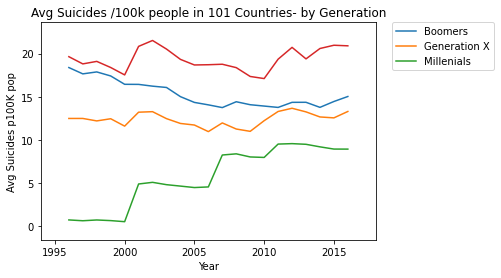

In [27]:

# Cleam table with Generations with little information (GI Generation 93 to 113 years-old) and Generation Z (5 to 14 years-old) 


generations = ["Boomers","Generation X","Millenials","Silent"]

plt.title("Avg Suicides /100k people in 101 Countries- by Generation")
plt.xlabel("Year")
plt.ylabel("Avg Suicides p100K pop")

for generation in generations:
    y_axis= suicide_data_95_all['suicides/100k pop'].loc[(suicide_data_95_all['generation']==generation)]
    x_axis= suicide_data_95_all['year'].loc[(suicide_data_95_all['generation']==generation)]
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    plt.margins(0.1)

    plt.plot (x_axis,y_axis,label=generation)
plt.savefig("by_Generation_All.png")    

In [16]:
# Suicides all countries
suicide_data_95_total= SuicideData.loc[(SuicideData["year"]>1995),("year","suicides/100k pop")]

suicide_data_95_total_grouped=suicide_data_95_data.groupby(["year"],as_index=False).mean()

print (suicide_data_95_total_grouped)



    year  suicides/100k pop
0   1996          15.305422
1   1997          14.954361
2   1998          14.926920
3   1999          14.532038
4   2000          13.941328
5   2001          13.519138
6   2002          13.786550
7   2003          13.205019
8   2004          12.481944
9   2005          12.068442
10  2006          11.927461
11  2007          12.025339
12  2008          11.907686
13  2009          11.400787
14  2010          11.215900
15  2011          11.015349
16  2012          11.421718
17  2013          11.107958
18  2014          11.011464
19  2015          11.094073
20  2016          13.421188


In [17]:
# Suicides all countries USA
suicide_data_95_data_USA_total= SuicideData.loc[(SuicideData["year"]>1995)&(SuicideData["country"]=="United States"),("year","suicides/100k pop")]

suicide_data_95_USA_total_grouped=suicide_data_95_data_USA_total.groupby(["year"],as_index=False).mean()


print (suicide_data_95_USA_total_grouped)


    year  suicides/100k pop
0   1996          13.870833
1   1997          13.496667
2   1998          13.375833
3   1999          12.564167
4   2000          12.215000
5   2001          12.351667
6   2002          12.501667
7   2003          12.136667
8   2004          12.241667
9   2005          12.223333
10  2006          12.094167
11  2007          12.426667
12  2008          12.770000
13  2009          12.849167
14  2010          13.240833
15  2011          13.530000
16  2012          13.761667
17  2013          13.889167
18  2014          14.277500
19  2015          14.617500


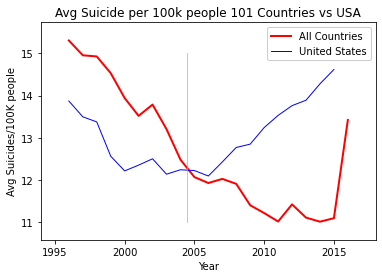

In [26]:

plt.title("Avg Suicide per 100k people 101 Countries vs USA")
plt.xlabel("Year")
plt.ylabel("Avg Suicides/100K people")

# All countries total
x_axis=suicide_data_95_total_grouped["year"].tolist()
y=suicide_data_95_total_grouped["suicides/100k pop"]
plt.plot(x_axis, y, color="red", linewidth=2,label="All Countries")

# USA total
x_axis=suicide_data_95_USA_total_grouped["year"].tolist()
y=suicide_data_95_USA_total_grouped["suicides/100k pop"]
plt.plot(x_axis, y, color="blue", linewidth=1,label="United States")


# draw vertical line from 
plt.plot([2004.5, 2004.5], [suicide_data_95_total_grouped["suicides/100k pop"].min(), 15], 'k-',color="orange", lw=.7)

plt.legend(framealpha=1, frameon=True)

plt.margins(0.1)
plt.savefig("All-USA_Total.png")
plt.show()


In [19]:


# Suicides Millenials All 
suicide_millenials_total= SuicideData.loc[(SuicideData["year"]>1995)&(SuicideData["generation"]=="Millenials"),("year","suicides/100k pop")]

suicide_millenials_grouped=suicide_millenials_total.groupby(["year"],as_index=False).mean()


print (suicide_millenials_grouped)



    year  suicides/100k pop
0   1996           0.735390
1   1997           0.640649
2   1998           0.729684
3   1999           0.656747
4   2000           0.532442
5   2001           4.897472
6   2002           5.089128
7   2003           4.818576
8   2004           4.653839
9   2005           4.485357
10  2006           4.557118
11  2007           8.254419
12  2008           8.389588
13  2009           8.029101
14  2010           7.973750
15  2011           9.520262
16  2012           9.571790
17  2013           9.494594
18  2014           9.199519
19  2015           8.942500
20  2016           8.937500


In [20]:

# Suicides Millenials All vs USA
suicide_millenials_USA= SuicideData.loc[(SuicideData["year"]>1995)&(SuicideData["generation"]=="Millenials")&(SuicideData["country"]=="United States"),("year","suicides/100k pop")]

suicide_millenials_USA_grouped=suicide_millenials_USA.groupby(["year"],as_index=False).mean()


print (suicide_millenials_USA_grouped)

    year  suicides/100k pop
0   1996             0.7750
1   1997             0.7800
2   1998             0.8150
3   1999             0.6100
4   2000             0.7350
5   2001             5.2175
6   2002             5.1675
7   2003             5.0475
8   2004             5.4275
9   2005             5.2450
10  2006             5.1100
11  2007             9.4900
12  2008             9.7700
13  2009             9.8650
14  2010            10.3350
15  2011            12.7650
16  2012            12.8325
17  2013            12.8650
18  2014            13.2275
19  2015            14.0150


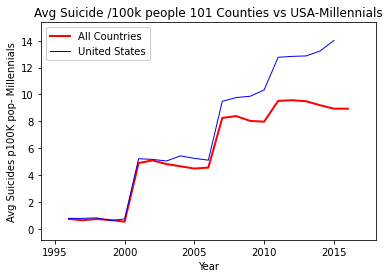

In [25]:
plt.title("Avg Suicide /100k people 101 Counties vs USA-Millennials")
plt.xlabel("Year")
plt.ylabel("Avg Suicides p100K pop- Millennials")

# All countries total
x_axis=suicide_millenials_grouped["year"].tolist()
y=suicide_millenials_grouped["suicides/100k pop"]
all=plt.plot(x_axis, y, color="red", linewidth=2, label="All Countries")

# USA total
x_axis=suicide_millenials_USA_grouped["year"].tolist()
y=suicide_millenials_USA_grouped["suicides/100k pop"]
USA=plt.plot(x_axis, y, color="blue", linewidth=1, label="United States")

plt.legend(framealpha=1, frameon=True)

plt.margins(0.1)
plt.savefig("Millennials.png")
plt.show()

In [22]:

# Suicides Gen X All 
suicide_X_total= SuicideData.loc[(SuicideData["year"]>1995)&(SuicideData["generation"]=="Generation X"),("year","suicides/100k pop")]

suicide_X_grouped=suicide_X_total.groupby(["year"],as_index=False).mean()


print (suicide_X_grouped)


    year  suicides/100k pop
0   1996          12.487890
1   1997          12.489123
2   1998          12.203703
3   1999          12.454819
4   2000          11.599826
5   2001          13.213466
6   2002          13.273488
7   2003          12.466337
8   2004          11.909048
9   2005          11.727024
10  2006          10.965000
11  2007          11.969942
12  2008          11.264353
13  2009          10.995337
14  2010          12.228750
15  2011          13.296105
16  2012          13.668086
17  2013          13.249437
18  2014          12.662372
19  2015          12.555645
20  2016          13.298437


In [23]:

# Suicides Gen X All vs USA
suicide_X_USA= SuicideData.loc[(SuicideData["year"]>1995)&(SuicideData["generation"]=="Generation X")&(SuicideData["country"]=="United States"),("year","suicides/100k pop")]

suicide_X_USA_grouped=suicide_X_USA.groupby(["year"],as_index=False).mean()


print (suicide_X_USA_grouped)

    year  suicides/100k pop
0   1996            13.1575
1   1997            12.7725
2   1998            12.4150
3   1999            11.8425
4   2000            10.9800
5   2001            12.7150
6   2002            12.5450
7   2003            12.5900
8   2004            12.5500
9   2005            12.3000
10  2006            12.2000
11  2007            12.9400
12  2008            13.2700
13  2009            13.1950
14  2010            16.0250
15  2011            18.1650
16  2012            18.4600
17  2013            18.0350
18  2014            18.5000
19  2015            18.8450


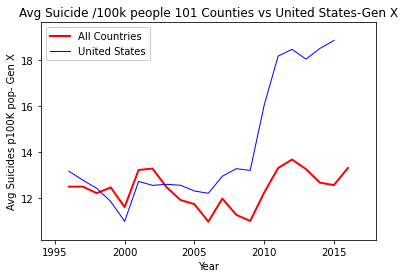

In [24]:
plt.title("Avg Suicide /100k people 101 Counties vs United States-Gen X")
plt.xlabel("Year")
plt.ylabel("Avg Suicides p100K pop- Gen X")

# All countries total
x_axis=suicide_X_grouped["year"].tolist()
y=suicide_X_grouped["suicides/100k pop"]
all=plt.plot(x_axis, y, color="red", linewidth=2, label="All Countries")

# USA total
x_axis=suicide_X_USA_grouped["year"].tolist()
y=suicide_X_USA_grouped["suicides/100k pop"]
USA=plt.plot(x_axis, y, color="blue", linewidth=1, label="United States")

plt.legend(framealpha=1, frameon=True)

plt.margins(0.1)

plt.savefig("GenX.png")
plt.show()

In [35]:
# By age tables

suicide_age_95_data_USA= SuicideData.loc[(SuicideData["year"]>1995)&(SuicideData["country"]=="United States"),("year","age","suicides/100k pop")]

suicide_age_95_USA=suicide_age_95_data_USA.groupby(["year","age"],as_index=False).mean()

print (suicide_age_95_USA)


suicide_age_95_data_all= SuicideData.loc[(SuicideData["year"]>1995),("year","age","suicides/100k pop")]

suicide_age_95_all=suicide_age_95_data_all.groupby(["year","age"],as_index=False).mean()

print (suicide_age_95_all)

     year          age  suicides/100k pop
0    1996  15-24 years             11.800
1    1996  25-34 years             14.515
2    1996  35-54 years             15.390
3    1996   5-14 years              0.775
4    1996  55-74 years             15.070
..    ...          ...                ...
115  2015  25-34 years             15.780
116  2015  35-54 years             18.845
117  2015   5-14 years              0.990
118  2015  55-74 years             18.145
119  2015    75+ years             21.695

[120 rows x 3 columns]
     year          age  suicides/100k pop
0    1996  15-24 years          10.521948
1    1996  25-34 years          14.453831
2    1996  35-54 years          18.384091
3    1996   5-14 years           0.735390
4    1996  55-74 years          19.642987
..    ...          ...                ...
120  2016  15-24 years           7.502500
121  2016  25-34 years          10.372500
122  2016  35-54 years          13.298437
123  2016  55-74 years          15.031875
124  2016 

No handles with labels found to put in legend.


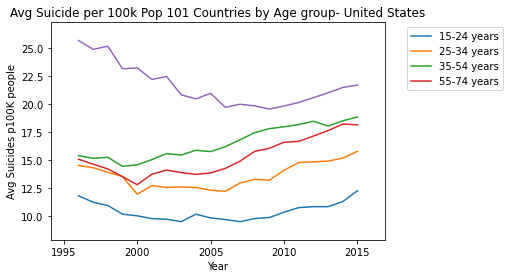

In [40]:

# by Group age

ages = ["15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]


plt.title("Avg Suicide per 100k Pop 101 Countries by Age group- United States")
plt.xlabel("Year")
plt.ylabel("Avg Suicides p100K people")

for age in ages:
    y_axis= suicide_age_95_USA['suicides/100k pop'].loc[(suicide_age_95_USA['age']==age)]
    x_axis= suicide_age_95_USA['year'].loc[(suicide_age_95_USA['age']==age)]

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.margins(0.1)
    fig = plt.figure(num=1, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
    plt.plot (x_axis,y_axis,label=age)
    
plt.savefig("by_age_USA.png")
                                        



No handles with labels found to put in legend.


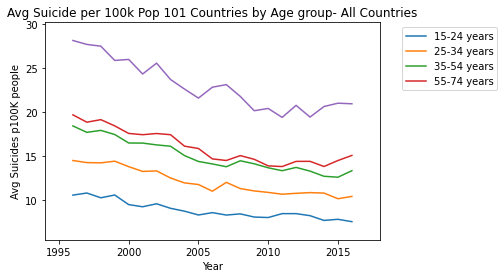

In [39]:
ages = ["15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]


plt.title("Avg Suicide per 100k Pop 101 Countries by Age group- All Countries")
plt.xlabel("Year")
plt.ylabel("Avg Suicides p100K people")

for age in ages:
    y_axis= suicide_age_95_all['suicides/100k pop'].loc[(suicide_age_95_all['age']==age)]
    x_axis= suicide_age_95_all['year'].loc[(suicide_age_95_all['age']==age)]

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.margins(0.1)
    fig = plt.figure(num=1, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
    plt.plot (x_axis,y_axis,label=age)
    
plt.savefig("by_age_all.png")
                                        
